---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [2]:
import pandas as pd

df1 = pd.DataFrame(friends_chars['CHANDLER'])
df2 = pd.DataFrame(friends_chars['JOEY'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])
df4 = pd.DataFrame(friends_chars['RACHEL'])
df5 = pd.DataFrame(friends_chars['ROSS'])
df6 = pd.DataFrame(friends_chars['MONICA'])

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,"He could be alone. This morning I heard him do push-ups, and then talk to his triceps.\n"
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [5]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [True] *df2.shape[0]
listOfCharacters3 = [False] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [False] *df5.shape[0]
listOfCharacters6 = [False] *df6.shape[0]


In [6]:
df1['Joey'] = listOfCharacters1
df2['Joey'] = listOfCharacters2 
df3['Joey'] = listOfCharacters3
df4['Joey'] = listOfCharacters4
df5['Joey'] = listOfCharacters5
df6['Joey'] = listOfCharacters6


In [7]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [8]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Joey
0,Okay if Mike were here what would the two of you be doing?\n,False
1,I think it’s the dying cat parade.\n,False
2,"Okay, well... guys?\n",False
3,"God, what is wrong with me.\n",False
4,"(singing) Happy, happy Chanukah, Chandler and Monica. Very merry…\n",False


In [9]:
df.head(10)

,Dialogue,Joey
0,Okay if Mike were here what would the two of you be doing?\n,False
1,I think it’s the dying cat parade.\n,False
2,"Okay, well... guys?\n",False
3,"God, what is wrong with me.\n",False
4,"(singing) Happy, happy Chanukah, Chandler and Monica. Very merry…\n",False
5,"Monica, I'm sorry I didn't come by last night. I was out with Gary; he let me ride around with h...",False
6,"That’s correct! This is an audio question, what do you do when the baby makes this sound? (Makes...",False
7,No! No! It’s just that he gave me three tickets and there are six of us!\n,False
8,No.\n,False
9,"Get the hell out of there, y’know?\n",False


In [10]:
from io import StringIO
col = [ 'Dialogue','Joey']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Joey']
category_id_df = df[['Dialogue', 'Joey']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Joey', 'Dialogue']].values)
df.head(10)


,Dialogue,Joey
0,Okay if Mike were here what would the two of you be doing?\n,False
1,I think it’s the dying cat parade.\n,False
2,"Okay, well... guys?\n",False
3,"God, what is wrong with me.\n",False
4,"(singing) Happy, happy Chanukah, Chandler and Monica. Very merry…\n",False
5,"Monica, I'm sorry I didn't come by last night. I was out with Gary; he let me ride around with h...",False
6,"That’s correct! This is an audio question, what do you do when the baby makes this sound? (Makes...",False
7,No! No! It’s just that he gave me three tickets and there are six of us!\n,False
8,No.\n,False
9,"Get the hell out of there, y’know?\n",False


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [12]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Joey
0,okay mike would two,False
1,think dying cat parade,False
2,okay well guys,False
3,god wrong,False
4,singing happy happy chanukah chandler monica merry,False


In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 6637 unique tokens.


{'\n': 1,
 'i': 2,
 'you': 3,
 'the': 4,
 'to': 5,
 'a': 6,
 'and': 7,
 'that': 8,
 'it': 9,
 'what': 10,
 'of': 11,
 'is': 12,
 'no': 13,
 'in': 14,
 'oh': 15,
 'this': 16,
 'me': 17,
 'we': 18,
 'okay': 19,
 'so': 20,
 'just': 21,
 'not': 22,
 'have': 23,
 'do': 24,
 'my': 25,
 'with': 26,
 'was': 27,
 'on': 28,
 'he': 29,
 'know': 30,
 'well': 31,
 'for': 32,
 'all': 33,
 'yeah': 34,
 'be': 35,
 'her': 36,
 'are': 37,
 'but': 38,
 'hey': 39,
 'right': 40,
 'at': 41,
 'up': 42,
 'out': 43,
 'get': 44,
 'like': 45,
 "i'm": 46,
 'your': 47,
 'gonna': 48,
 'can': 49,
 'i’m': 50,
 'monica': 51,
 'him': 52,
 'joey': 53,
 'if': 54,
 'think': 55,
 'about': 56,
 'go': 57,
 'look': 58,
 'here': 59,
 'his': 60,
 'she': 61,
 'really': 62,
 'don’t': 63,
 "it's": 64,
 'one': 65,
 'ross': 66,
 'did': 67,
 'they': 68,
 'it’s': 69,
 "don't": 70,
 'there': 71,
 'now': 72,
 'yes': 73,
 'uh': 74,
 'see': 75,
 'why': 76,
 'mean': 77,
 'how': 78,
 'got': 79,
 'good': 80,
 'because': 81,
 'when': 82,
 "th

In [17]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (99233, 120)


array([[   0,    0,    0, ..., 1090,   89,  137],
       [   0,    0,    0, ..., 3130, 1279, 1720],
       [   0,    0,    0, ...,   19,   31,  109],
       ...,
       [   0,    0,    0, ...,    0,    0,   77],
       [   0,    0,    0, ...,  426,  163,  203],
       [   0,    0,    0, ...,  274,  575,  146]], dtype=int32)

In [18]:
Y = pd.get_dummies(df['Joey']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 120) (66486, 2)
(32747, 120) (32747, 2)


In [20]:
X_test

array([[   0,    0,    0, ...,   65,  374, 1044],
       [   0,    0,    0, ...,  615,  609,  319],
       [   0,    0,    0, ...,    0,  259,   62],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   45,  211,  177],
       [   0,    0,    0, ...,  998, 3238, 3840]], dtype=int32)

In [21]:
Y_test


array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [22]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [23]:
X.shape[1]

120

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1102 10:44:42.265363 4546842048 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 73s 1ms/sample - loss: 0.4276 - accuracy: 0.8378 - val_loss: 0.4135 - val_accuracy: 0.8386
Epoch 2/10
59837/59837 [==============================] - 69s 1ms/sample - loss: 0.3853 - accuracy: 0.8492 - val_loss: 0.4014 - val_accuracy: 0.8416
Epoch 3/10
59837/59837 [==============================] - 78s 1ms/sample - loss: 0.3594 - accuracy: 0.8580 - val_loss: 0.3967 - val_accuracy: 0.8440
Epoch 4/10
59837/59837 [==============================] - 72s 1ms/sample - loss: 0.3414 - accuracy: 0.8651 - val_loss: 0.3931 - val_accuracy: 0.8472
Epoch 5/10
59837/59837 [==============================] - 77s 1ms/sample - loss: 0.3265 - accuracy: 0.8717 - val_loss: 0.3917 - val_accuracy: 0.8507
Epoch 6/10
59837/59837 [==============================] - 78s 1ms/sample - loss: 0.3139 - accuracy: 0.8765 - val_loss: 0.3867 - val_accuracy: 0.8513
Epoch 7/10
59837/59837 [==============================] -

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

NameError: name 'EarlyStopping' is not defined

In [27]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32747/32747 [==============================] - 40s 1ms/sample - loss: 0.3913 - accuracy: 0.8593
Test set
  Loss: 0.391
  Accuracy: 0.859


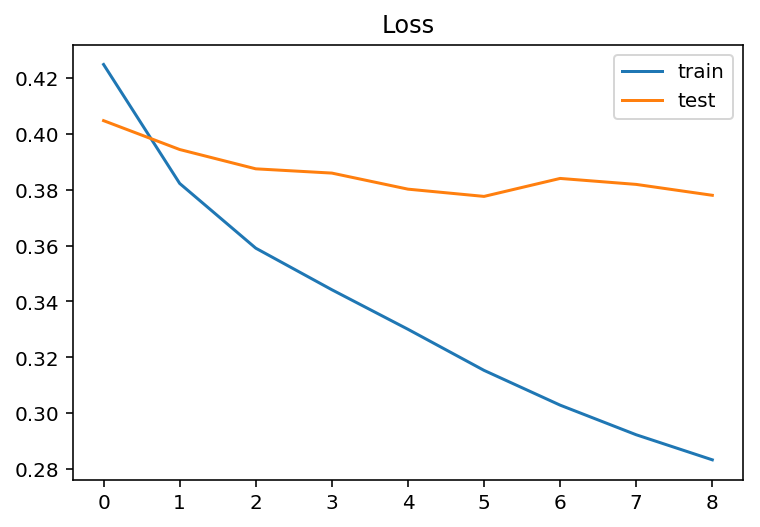

In [28]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [26]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[9.9852955e-01, 1.4704458e-03],
       [3.7498161e-01, 6.2501836e-01],
       [8.1371444e-01, 1.8628554e-01],
       ...,
       [8.4222347e-01, 1.5777649e-01],
       [5.6960642e-01, 4.3039358e-01],
       [9.9948150e-01, 5.1855156e-04]], dtype=float32)

In [27]:
Y_test


array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [28]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 1 0 ... 0 0 0]


In [29]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 1 ... 0 0 0]


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



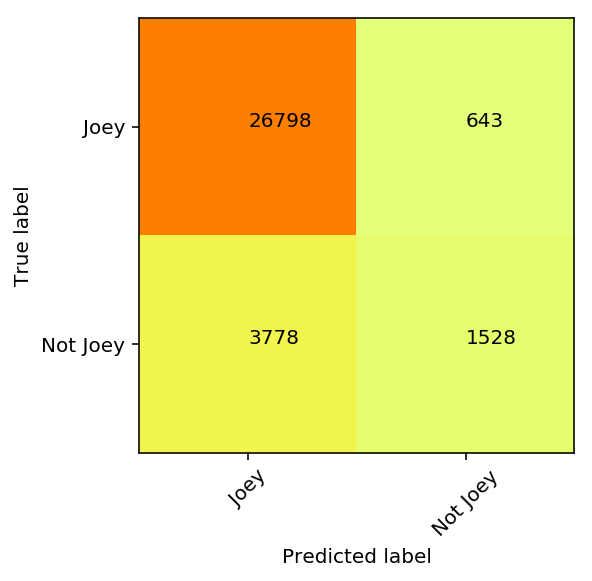

In [31]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Joey','Not Joey']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [32]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Joey', 'Not Joey']
print(classification_report(y_true, y_pred, target_names=target_names))
     

              precision    recall  f1-score   support

        Joey       0.88      0.98      0.92     27441
    Not Joey       0.70      0.29      0.41      5306

    accuracy                           0.86     32747
   macro avg       0.79      0.63      0.67     32747
weighted avg       0.85      0.86      0.84     32747



In [24]:
import numpy as np
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 0 0]


In [25]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [26]:
y_pred1=clf.predict(X_test)

In [27]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 0 ... 0 0 0]


In [28]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Joey', 'Not Joey']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

        Joey       0.84      0.98      0.90     27443
    Not Joey       0.19      0.02      0.04      5304

    accuracy                           0.83     32747
   macro avg       0.51      0.50      0.47     32747
weighted avg       0.73      0.83      0.76     32747

